<a href="https://colab.research.google.com/github/sergioarnold87/Practica_Sergio/blob/main/Upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Google colab tools

In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Librerias 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Ads_CTR_Optimisation.csv')

# Algoritmo de UCB

In [7]:
import math
N = 10000
d = 10
number_of_selections = [0] * d
sums_of_rewards = [0] * d
ads_selected = []
total_reward = 0
for n in range(0, N):
  max_upper_bound = 0
  ad = 0
  for i in range(0, d):
    if(number_of_selections[i]>0):
        average_reward = sums_of_rewards[i] / number_of_selections[i]
        delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
        upper_bound = average_reward + delta_i
    else:
        upper_bound = 1e400

    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

# Histograma de resultados

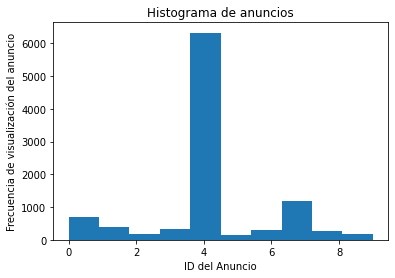

In [8]:
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()